<a href="https://colab.research.google.com/github/adityapribadi3/Privacy-Machine-Learning/blob/main/MEAP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1: Studying Tensor and Pytorch

## Learning torch and some functionalities it has

Scalar: any single number

Vector: 1 dimensional array

Matrix: 2 dimensional array

In [1]:
import torch

In [2]:
torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([1, 2, 3, 4])
torch_matrix = torch.tensor([
                             [1, 2, 3, 4],
                             [1, 2, 3, 4],
                             [1, 2, 3, 4]
                             ])
torch_tensor3d = torch.tensor([
                             [
                              [1, 2, 3],
                              [5, 6, 7],
                              ],
                             [
                              [9, 10, 11],
                              [13, 14, 15],
                              ],
                             [
                              [17, 18, 19],
                              [21, 22, 23],
                              ],
                             [
                              [25, 26, 27],
                              [29, 30, 31],
                              ],
                             ])

In [3]:
print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)

torch.Size([])
torch.Size([4])
torch.Size([3, 4])
torch.Size([4, 2, 3])


Importing numpy and changing it into tensor object.

In [4]:
import numpy as np

x_np = np.random.random((4, 4))
print(x_np)

[[0.97669556 0.96140426 0.97395849 0.64391015]
 [0.9925855  0.83173927 0.38089637 0.390025  ]
 [0.26095392 0.19721877 0.83849368 0.28437901]
 [0.55887829 0.85378742 0.14107495 0.20414029]]


In [5]:
x_pt = torch.tensor(x_np)
print(x_pt)

tensor([[0.9767, 0.9614, 0.9740, 0.6439],
        [0.9926, 0.8317, 0.3809, 0.3900],
        [0.2610, 0.1972, 0.8385, 0.2844],
        [0.5589, 0.8538, 0.1411, 0.2041]], dtype=torch.float64)


Sometimes type is also a problem in casting as they may be changed. Hence, defining it explicitly can prevent this kind of thing to happen.

In [6]:
x_np = np.asarray(x_np, dtype=np.float32)
x_pt = torch.tensor(x_np, dtype=torch.float32)
print(x_np.dtype, x_pt.dtype)

float32 torch.float32


We can also use logic operations to quickly create a binary masks (a mask to tell us which portion of tensors are valid to be used)

In [7]:
b_np = (x_np > 0.5)
print(b_np)
print(b_np.dtype)

[[ True  True  True  True]
 [ True  True False False]
 [False False  True False]
 [ True  True False False]]
bool


In [8]:
b_pt = (x_pt > 0.5)
print(b_pt)
print(b_pt.dtype)

tensor([[ True,  True,  True,  True],
        [ True,  True, False, False],
        [False, False,  True, False],
        [ True,  True, False, False]])
torch.bool


While numpy and pytorch are not identical, they share many functions with the same names, behaviours, and characteristics.

In [9]:
np.sum(x_np)

9.490141

In [10]:
torch.sum(x_pt)

tensor(9.4901)

In [11]:
np.transpose(x_np)

array([[0.97669554, 0.9925855 , 0.26095393, 0.5588783 ],
       [0.96140426, 0.83173925, 0.19721878, 0.8537874 ],
       [0.9739585 , 0.38089636, 0.8384937 , 0.14107496],
       [0.64391017, 0.390025  , 0.284379  , 0.20414029]], dtype=float32)

In [12]:
torch.transpose(x_pt,0,1)

tensor([[0.9767, 0.9926, 0.2610, 0.5589],
        [0.9614, 0.8317, 0.1972, 0.8538],
        [0.9740, 0.3809, 0.8385, 0.1411],
        [0.6439, 0.3900, 0.2844, 0.2041]])

In [13]:
print(torch.transpose(torch_tensor3d,0,2))

tensor([[[ 1,  9, 17, 25],
         [ 5, 13, 21, 29]],

        [[ 2, 10, 18, 26],
         [ 6, 14, 22, 30]],

        [[ 3, 11, 19, 27],
         [ 7, 15, 23, 31]]])


## Timing torch

In [14]:
import timeit
x = torch.rand(2**11,2**11)
time_cpu = timeit.timeit("x@x", globals=globals(), number=100)
print(time_cpu)

24.18995887699998


In [15]:
print("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")

Is CUDA available? : True


In [16]:
x = x.to(device)
time_gpu = timeit.timeit("x@x", globals=globals(), number=100)
print(time_gpu)

0.0029062129999601893


GPU gives us faster time. However, we need to keep in mind that it only works if every object involved is on the same device. The commented code below will give us an error.

In [17]:
x = torch.rand(128,128).to(device)
y = torch.rand(128,128)
# x*y

Sometimes we also want to convert it back to numpy. Doing such thing on torch object on GPU device will raise an error. Hence, we need to move it back to CPU as shown below.

In [18]:
x.cpu().numpy

<function Tensor.numpy>

We can create a simple function as below as well.

In [19]:
def moveTo(obj, device):
    """
    obj: the python object to move to a device, or to move its contents to a device
    device: the compute device to move objects to
    """
    print('Initial object: ', obj)
    if isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    elif isinstance(obj, tuple):
        return tuple(moveTo(list(obj), device))
    elif isinstance(obj, set):
        return set(moveTo(list(obj), device))
    elif isinstance(obj, dict):
        to_ret = dict()
        for key, value in obj.items():
            to_ret[moveTo(key, device)] = moveTo(value, device)
        return to_ret
    elif hasattr(obj, "to"):
        print('here: ', obj)
        return obj.to(device)
    else:
        print('here_1')
        return obj

In [20]:
print("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")

Is CUDA available? : True


In [21]:
some_tensors = [torch.tensor([1,2]), torch.tensor(2)]
print(moveTo(some_tensors, device))

Initial object:  [tensor([1, 2]), tensor(2)]
Initial object:  tensor([1, 2])
here:  tensor([1, 2])
Initial object:  tensor(2)
here:  tensor(2)
[tensor([1, 2], device='cuda:0'), tensor(2, device='cuda:0')]


## Finding minimum using derivation and gradients (loss function)

## Calculating gradient: why we need gradient?

In [22]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


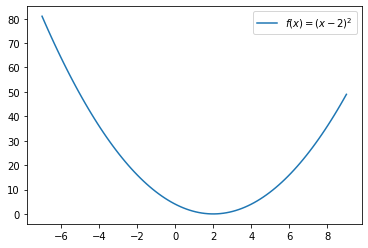

In [23]:
def f(x):
    return torch.pow((x-2.0),2)

x_axis_vals = np.linspace(-7,9,100)
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()
sns.lineplot(x_axis_vals, y_axis_vals, label='$f(x)=(x-2)^2$')

From the graph, we know that the minimum value of function x is at $x=2$, where value of $f(2)=0$. We can use calculus to find it's minimum.

First we denote that the derivative of $f(x)$ is $f'(x)$, and we can get the answer from calculus that the derivative of function $f(x)=(x-2)^2$ is $f'(x)=2x-4$. The minimum of a function ($x$<sup>*</sup>) exists at critical points, which are points where $f(x)=0$.

To solve it we can use the math below:

$0=2x-4$ \
$4=2x$ \
$x=2$ \

However, pytorch cannot do that as we will solve a more complicated task.
So, we need to guess the $x$<sup>?</sup>.

We can use f’($x$<sup>?</sup>) to help us know how to adjust x? so that we move closer to a minimizer.

How is that possible? Lets plot $f(x)$ and $f’(x)$ at the same time.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


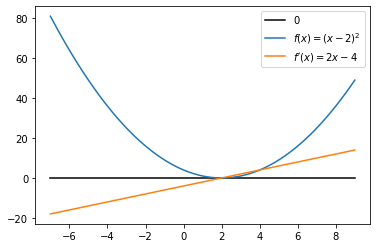

In [24]:
def fP(x): 
    '''
        Defining the derivative of f(x) manually
    '''
    return 2*x-4

y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

#First, lets draw a black line at 0, so that we can easily tell if something is positive or negative
sns.lineplot(x_axis_vals, [0.0]*len(x_axis_vals), label="0", color='black')
sns.lineplot(x_axis_vals, y_axis_vals, label='$f(x) = (x-2)^2$')
sns.lineplot(x_axis_vals, y_axis_vals_p, label="$f'(x)=2 x - 4$")

Looking at the graphic above, we see that the orange line with function $f'(x) < 0$ if $x < 2$ and $f'(x) > 0$ if $x > 2$. $f’$ tells us which direction we should move to find a minimizer. This process of gradient decent is summarized in the Figure below.

<img src="https://drive.google.com/uc?export=view&id=1uN_-FivZGR_wLGgVpb0lyJR0zdDyJ1aC" alt="drawing" width="600"/>

We also care about the magnitude of $f’(x$<sup>?</sup>$)$. Because we are looking at a one dimensional function, the magnitude just means the absolute value of $f’(x$<sup>?</sup>$)$, i.e., $| f’(x$<sup>$?$</sup>$)|$. 

The magnitude gives us an idea about how far away we are from the minimizer. So, the sign of $f’(x$<sup>?</sup>$)$ (<0 or >0) tells us which direction we should head, and the size ($| f’(x)|$) tells us how far we should head. This will always be true for any function. So if we can compute a derivative, we can find a minimizer.

Torch has a simple function to calculate this gradient


In [25]:
x = torch.tensor([-3.5], requires_grad=True)
print(x.grad)

None


Now There is no current gradient, but let's see after we put the value x to the function f we have defined above, which returns $f(x)=(x-2)^2$

In [26]:
value = f(x)
print(value)

tensor([30.2500], grad_fn=<PowBackward0>)


Notice that we now have different value. Once we told pytorch to calculate the gradian (requires_grad=true) it will keep track every computation that we do. Then, it use that information to go backward and calculate gradients for everything that had a requires_grad=true.

In [27]:
value.backward()
print(x.grad)

tensor([-11.])


That covers how we calculate gradient.we can use this automatic differentiation of our PyTorch function $f(x)$ to numerically find the answer that $f(2) = 0$.

## Optimization Steps

After calculating the gradient. What we want to do next is find the minimum of the function $f(x)$. This process is called optimization.To do that, first, we define a random value $x$<sub>$cur$</sub>$=-3.5$ and keep track the previous value $x$<sub>$prev$. 

Since we have not done anything yet, it is okay for us to keep a bigger valur for the previous x, e.g., 100.

Next we compare if the our previous guess is similar by checking 

$∥x$<sub>cur</sub>$ − x$<sub>prev</sub>$∥$<sub>$2$</sub>$ > \epsilon.$

The function $∥z∥$<sub>$2$</sub> is called the norm or 2-norm. Norms are the most common and standard ways of measuring magnitude for vectors and matrices. The value of $\epsilon$ is a common mathematical notation to refer to some arbitrary small value.

if value $> \epsilon$ we know that there are large changes, otherwise there are small changes. When the changes are small, we can stop and accept $x$<sub>$cur$</sub> as our answer, otherwise we need better guess.

To get this we need the opposite direction of derivative, which looks like the notation below.

$x$<sub>$cur$</sub>$= x$<sub>$cur$</sub>$ - \eta \cdot f'(x$<sub>$cur$</sub>$)$

, such that $\eta$ is the learning rate which value is usually small (e.g., 0.1 or 0.01).

We do this because the gradient $f'(x)$ tells us which way to head, but only gives us a relative answer about how far away we are. It doesn’t tell us exactly how far we should travel in that direction. Since we don’t know how for to travel, we want to be conservative and go a little slower.

In [28]:
import torch

In [29]:
def f(x):
    return torch.pow((x-2.0),2)

In [30]:
x = torch.tensor([3.5], requires_grad=True)
x_cur = x.clone()
x_prev = x_cur*100 #Make the initial "previous" solution larger
epsilon = 1e-5
learning_rate = 0.1

In [31]:
while torch.norm(x_cur-x_prev) > epsilon:
    # We need to make a clone here so that x_prev and x_cur don't point to the same object
    x_prev = x_cur.clone() 

    # Compute our function, gradient, and update
    value = f(x)

    # Compute gradient of x
    value.backward()

    # print("Gradient: ",x.grad)
    x.data -= learning_rate * x.grad

    # We need to zero out the old gradient, as pytorch will not do that for us
    x.grad.zero_() 
    # current data
    x_cur = x.data

print(x_cur)

tensor([2.0000])


As stated before, what we just did was optimization by finding the minimum of function $f(x)$. By defining loss function $l(x)$, we optimize $f(x)$ to minimize the loss. Meaning that if $l(x)$ is closer to 0, our network is closer to solve the problem perfectly.

The figure below shows how it works:

<img src="https://drive.google.com/uc?export=view&id=1S4Ks-XxsAP6tIqqvnagNK8jc9KXS_f5a" alt="drawing" width="600"/>

Pytorch has 2 additional concept to help us. The **parameter** and the **optimizer**.

**Parameter** of a model is a value we want to alter using an **optimizer** so that we can reduce our loss $l(x)$.

We can easily convert a tensor object into parameters as shown below.

In [32]:
x_param = torch.nn.Parameter(torch.tensor([-3.5]), requires_grad=True)
x_param

Parameter containing:
tensor([-3.5000], requires_grad=True)

After creating parameter, the next thing that we want to do is to create an **optimizer**.

Torch has provided us with several different optimizers. One of them is called the SGD, which stands for (Stochastic Gradient Decent). The word "gradient" is because we are using the derivatives/gradients of the function. The word "decent" is because we are minimizing or descending to a lower value of the function that we minimize.

To use SGD we can use the function below.

In [33]:
optimizer = torch.optim.SGD([x_param], lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Now, we can re-write our previous loop into:

In [34]:
for epoch in range(60):
    # x.grad.zero_()
    optimizer.zero_grad() 

    # value
    loss_incurred = f(x_param) 

    # calculate gradient
    loss_incurred.backward() 

    # x.data -= eta * x.grad
    optimizer.step() 
    
print(x_param.data)

tensor([2.0000])


## Loading DataSet Object

Now, if we want to do some classification let's start with reading data and using common notation. For example notation X is usually used for input data while Y is the label.

Pytorch has Dataset class to represent a dataset. It includes information about:

1. How many items are in the dataset.
2. How to get the n'th item in the dataset.

In [35]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
# The MNIST database of handwritten digits with 784 features
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)

(70000, 784)


We can see that we have loaded the classic MNIST dataset with a total of 70,000 rows and 784 features.

Now we will create a __SimpleDataset__ class that takes in X, y as input.

This class will have $__getitem__$ and $__len__$ functions.

In [36]:
class SimpleDataset(Dataset):
    def __init__(self, X, y):
        '''
            input:
            X = n-dimensional input data
            y = label as scalar

            definition:
            a constructor to initialize the value
        '''
        self.X = X
        self.y = y
    
    def __getitem__(self, index):
        '''
            input:
            index = an index to retrieve a certain item within the dataset

            definition:
            a method to get a cretain item from the dataset

            return:
            a set of item (input, and its output/label)
        '''
        input = torch.tensor(self.X[index,:], dtype=torch.float32)
        target = torch.tensor(int(self.y[index]), dtype=torch.int64)
        return input, target

    def __len__(self):
        '''
            definition:
                a method to get the lenght of the item
        '''
        return self.X.shape[0]

In [37]:
#Now we can make a PyTorch dataset
dataset = SimpleDataset(X, y)
dataset

In [38]:
print("Length: ", len(dataset))
example, label = dataset[0]
print("Features: ", example.shape) #Will return 784
print("Label of index 0: ", label)

Length:  70000
Features:  torch.Size([784])
Label of index 0:  tensor(5)


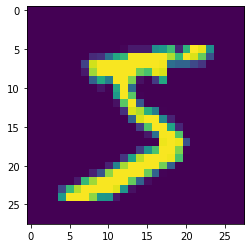

In [39]:
import matplotlib.pyplot as plt

plt.imshow(example.reshape((28,28)))

## Creating training and testing split

In [42]:
# Define train and test size
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_size, test_size))
print("{} examples for training and {} for testing".format(len(train_dataset),
len(test_dataset)))

56000 examples for training and 14000 for testing
